<a href="https://colab.research.google.com/github/Aleksei115/Probabilidad-Distribucion-Normal/blob/main/ProyectoProbabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución Normal

#### Autor: "Aleksei Ithan García Díaz"


Para este proyecto, se decidio utilizar un dataframe que recaba datos del clima desde el año 2006 hasta el 2016. El dataframe consta de varias columnas con datos variados, desde la fecha en la que se hizo la medición, hasta una describción breve del clima de el dia en curso.

La distribución de probabilidad continua más importante en todo el campo de la estadística es la distribución normal.

La cual describe de manera aproximada muchos fenómenos que ocurren en la naturaleza, la industria y la investigación. 
Por ejemplo, las mediciones físicas en áreas como los experimentos meteorológicos, estudios de la precipitaciónpluvial y mediciones de partes fabricadas a menudo se explican más que adecuadamente con una distribución normal. Además, los errores en las mediciones científicas se aproximan muy bien mediante una distribución normal.


La densidad de la variable aleatoria normal $X$, con media $μ$ y desviación estándar $σ^2$, es

$$n(x ; μ, σ) = \frac{1}{\sqrt(2πσ)}⋅e^-(\frac{1}{2σ^2})⋅(x-μ)^2, \hspace{1cm} -∞ < x< ∞ $$

donde π = 3.14159. . . y e = 2.71828

El dataframe que ocupo consta de casi $19,000$ filas, varias mediciones repetidas y son mediciones diarias, por lo que decidi hacer un tratamiento de los datos para obtener el promedio de cada año y poder obtener mi distribución normal sobre ese dataframe más reducido, además de que para esta distribución solo se centrara en crear la distribución con los datos obtenidos de las velocidades del viento, asi que los demás datos no me son de utilidad.



*Las librerias que utilizaré son:*

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

*En la siguiente sección es haré el tratamiento de los datos:*

In [4]:
#Cargo mi archivo con los datos
df = pd.read_csv("./weatherHistory.csv")

#Creo el dataframe
datos = pd.DataFrame(df)

# Agregamos una columna que tenga formato de fecha
datos[["Date-Time","TZ"]]=datos["Formatted Date"].str.split("+",expand=True)

# Eliminamos la columna Formatted Date y creamos un nuevo dataset 
datos1 = datos.drop(columns="Formatted Date")\

#Creo un orden para todas las columnas  
columns_order=["Date-Time","TZ","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]

#Reordeno mi dataframe con el orden que cree para las columnas 
datos1 = datos1.reindex(columns=columns_order)

#Elimino la columna TZ
datos1 = datos1.drop(columns="TZ")

#Doy fomato a las fechas

datos1["Date-Time"] = pd.to_datetime(datos1["Date-Time"])
datos1["Year"] = datos1["Date-Time"].dt.year
datos1["Month"] = datos1["Date-Time"].dt.month
datos1["Day"] = datos1["Date-Time"].dt.day

#Elimino la columna Date-Time
datos1 = datos1.drop(columns="Date-Time")

#Una vez que he extraido el año,mes y dia de la columna Date Time, agrego esas columnas respectivamente
columns_order=["Dia","Mes","Year","Summary","Precip Type","Temperature (C)","Apparent Temperature (C)",
                "Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Loud Cover",
                "Pressure (millibars)", "Daily Summary"]

#Reordeno las columnas con el nuevo orden que creé
datos1 = datos1.reindex(columns=columns_order)


La siguiente linea es muy importante, ya que en esa linea tomaré la columna de "Wind Speed (km/h)" y haré dataframe con los promedios de todas las velocidades por año, es decir si hubieron $2,000$ mediciones en el año 2016, sacaré el promedio de esas mediciones y lo meteré en un dataframe.

In [5]:
promedio_velocidad_viento = pd.DataFrame(datos1.groupby("Year")["Wind Speed (km/h)"].mean())

*El dataframe se ve de la siguiente manera:*

In [6]:
print(promedio_velocidad_viento)

      Wind Speed (km/h)
Year                   
2006          10.189852
2007          10.825392
2008          11.303897
2009          11.505948
2010          11.015628
2011           9.898262
2012          11.264545
2013          10.969389
2014          10.502473
2015          10.735247
2016          10.703441


Para la distribucion normal se necesita la media y la desviación estándar, así que la debo calcular.

In [15]:
media_lista = promedio_velocidad_viento["Wind Speed (km/h)"].tolist()

media = 0
for elemento in media_lista:
  media += elemento

media = media / len(media_lista) 

#Tambien se puede utilizar la libreria de pandas para obtener la desviación estándar rápidamente 
desv = promedio_velocidad_viento["Wind Speed (km/h)"].std()


### $$μ = 10.81$$
### $$σ = 0.482$$ 

Ahora lo que haremos es construir la gráfica de nuestra distribución normal

Text(0, 0.5, 'f(x)')

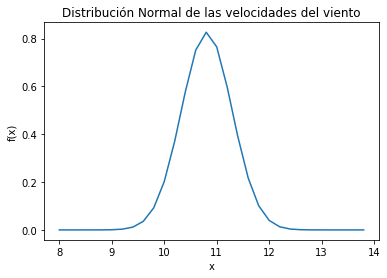

In [18]:
#Crearemos un array desde 8 hasta 14 para graficar la curva normal 

x = np.arange(8, 14, .2)
#Calcuré rapidamente los valores para Y con un objeto ya programado de la libreria scipy
y = stats.norm.pdf(x, media, desv)

#Grafico 

plt.plot(x, y)
plt.title("Distribución Normal de las velocidades del viento")
plt.xlabel("x")
plt.ylabel("f(x)")


Una vez que tenemos la distribución, nos es útil para contestar la pregunta.

¿Cuál es la probabilidad de que la velocidad de viento sea  mayor a 11 $\frac{km}{h}$ ?
La respuesta se contesta con $$\int_{11}^{∞} n(x ; 10.81, 0.482) dx $$

In [20]:
prob = 1 - stats.norm.cdf(11, loc=media, scale=desv)  # Calcula P(X>11)
print(prob)

0.34722014659395994


$$\int_{11}^{∞} n(x ; 10.81, 0.482) dx =  0.347$$